Introduction

Loading packgages

Loading data

Data at first sight

Metadata

Descriptive statistics

Handling imbalanced classes

Data Quality Checks

Exploratory Data Visualization

Feature engineering

Feature selection

Feature scalining

Conclusion

1. Loading Packages

in this lib, preprocessing does not have imputer anymore. it's in just sklearn and imputer renames as impute.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import impute
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
#model의 중요도에 따라 feature를 선택
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [ ]:
#for kaggle :

# train=pd.read_csv('../input/train.csv')
# test=pd.read_Csv('../input/test.csv')

debugiing set

만약 데이터의 수가 수백만개면 sample만 추출해서 (약 5~10만정도)

In [ ]:
debug =True

In [ ]:
if debug :
  nrows = 10000
else :
  nrows = None

In [ ]:
dic='/content/drive/MyDrive/주피터_대피소/kaggle&github/2. Driver Prediction/'

train=pd.read_csv(dic+'train.csv',nrows=nrows)
test=pd.read_csv(dic+'test.csv',nrows=nrows)

# ID=test['id']


Data at first sight

Here is an excerpt of the data description for the competition :

- Features that belong to similar groupings are tagged as such in the feature names(e.g., ind,reg,car,calc).
- Feature names include the postfix bin to indicate binary feature and cat to indicate categorical features.
- Features without these designations are either continuous or ordinal.
- Values of -1 indicate that the feature was missing for the observation.
- The targer columns signifies wheher or not a claim was filed for that policy holder.


In [ ]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


we got #595k datas in it. that why the volumns of files are large. 

We indeed see the following
- binary variables
- categorical variables of which the category values a re integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

In [ ]:
train.shape

(595212, 59)

we have 59columns and 595k rows. and check there are duplicate rows in the training data.

In [ ]:
train.drop_duplicates()
train.shape

(595212, 59)

nope. and check test data.

In [ ]:
test.shape

(892816, 58)

In [ ]:
test.drop_duplicates()
test.shape

(892816, 58)

we have missing one variable in the test set.



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

the data says, you need to make dummies. and they check the list name of _cat. also they already made dummies names as _bin.

Metadata

To faciliate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific variables for analysis, visualization, modeling..

Concretely we will store :
- role : input, ID, Target
- level : nomial, interval, ordinal, binary
- keep : True or False
- dtype : int, float, str

In [ ]:
data = []

for f in train.columns :
  #Defining the role
  if  f == 'target' :
    role == 'target'
  elif f =='id' :
    role = 'id'
  else :
    role = 'input'
  #Defining the level
  if 'bin' in f or f == 'target' :
    level = 'binary'
  elif 'cat' in f or f == 'id' :
    level = 'nominal'
  elif train[f].dtype == float :
    level = 'interval'
  elif train[f].dtype == int :
    level = 'ordinal'
  #Inintialize keep to True for all variables excep for id
  keep = True
  if f == 'id' :
    keep = False
  #Defining the data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the meradata for the variable
  f_dict = {
      'varname' :f,
      'role' : role,
      'level' : level,
      'keep':keep,
      'dtype':dtype
  }
  data.append(f_dict)


meta=pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])

meta.set_index('varname', inplace=True)

In [ ]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,id,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [ ]:
meta[ ( meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
pd.DataFrame( {'count' : meta.groupby(['role','level'])['role'].size() }).reset_index()

,role,level,count
0,id,binary,1
1,id,nominal,1
2,input,binary,17
3,input,interval,10
4,input,nominal,14
5,input,ordinal,16


#Descriptive statistics

We can also apply the describe method on the df. however, it doesnt make much sense to calculate the mean, std,... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thank to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To kkep thing clear, well do this per datatype.

Interval variables

In [ ]:
v= meta[(meta.level == 'interval') & (meta.keep)].index

train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg variable
- only ps_reg_03 has missing values
- the range (min to max) differs btw the variables. we could apply scailing (e.g. Standardscaler), but it depends on the classifier we will want to use.

Car variables
- ps_car_12 and 14 have missing values
- again, the range differs and we could apply scailing

calc variables
- no missing values
- this seems to be some kind of ratio as the maximum is 0.9
- all three _calc variables have very similar distributions

Overall, we cna see that the range of the interval variabels i rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?

Ordinal variables

In [ ]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index

train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- we have only ps_car_11 missing values in it.
- also we need to scailing these datas with the different rages

- why in target is in ordinal? maybe it's miscoded? check it again.

Binary variables

In [ ]:
v=meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Handling imbalances classes

As we mentioned above the proportion of records with targe=1 is far less than targer=0. This can lead to a model that has great accuracy but does have any added value in practice. 2possible strategies to deal with this problem are :

1. oversampling records with target=1
2. undersampling records with target=0

in this session, we go for ***undersampling***.

undersampling?
- 불균형한 데이터 셋에서 높은 비율을 차지하는 클래스의 데이터 수를 감소시켜 불균을 해소
- 학습에 사용되는 전체 데이터 수를 급격하게 감소시켜 성능이 하락할 가능성이 높음

**SMOTE(Synthetic Minority Over-Sampling Technique)
- 낮은 비율 클래스 데이터의 최근접 이웃을 이용하여 새로운 데이터를 생성
- 재현율과 정밀도를 고려

*SMOTE package

from imlearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
x_train_over, y_train_over = smote.fit_sample(x_train, y_train)

In [ ]:
desired_apriori = 0.10

#Get the indices per target value

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

#calculate the undersampling rate and resulting number of records with target = 0

undersampling_rate = ( (1-desired_apriori)*nb_1/(nb_0*desired_apriori))

undersampling_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0 : {}'.format(undersampling_rate))

print('#records with target= 0 after undersampling : {}'.format(undersampling_nb_0))

# Randomly select records with target=0 to get at the desired a priori

undersampled_idx = shuffle(idx_0, random_state=42, n_samples=undersampling_nb_0)

#Construct list with remainign indices
idx_list = list(undersampled_idx) + list(idx_1)

#Return undersample data frame
train=train.loc[idx_list].reset_index(drop=True)


Rate to undersample records with target = 0 : 0.34043569687437886
#records with target= 0 after undersampling : 195246


##Data Quality Checks

checking missing values

In [ ]:
vars_with_missing= []

for f in train.columns :
  missings = train[train[f] == -1][f].count()
  if missings >0 :
    vars_with_missing.append(f)
    missings_perc = missings/train.shape[0]

    print('Variable {} has {} records ({:.2f}%) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values.'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 100 records (0.00%) with missing values
Variable ps_ind_04_cat has 50 records (0.00%) with missing values
Variable ps_ind_05_cat has 2317 records (0.01%) with missing values
Variable ps_reg_03 has 38780 records (0.18%) with missing values
Variable ps_car_01_cat has 57 records (0.00%) with missing values
Variable ps_car_02_cat has 1 records (0.00%) with missing values
Variable ps_car_03_cat has 148997 records (0.69%) with missing values
Variable ps_car_05_cat has 96192 records (0.44%) with missing values
Variable ps_car_07_cat has 4495 records (0.02%) with missing values
Variable ps_car_09_cat has 234 records (0.00%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15534 records (0.07%) with missing values
In total, there are 12 variables with missing values.


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Dropping the variables with too many missing values

vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop, axis=1, inplace = True)
meta.loc[(vars_to_drop), 'keep'] = False

# Imputing with the mean or mode

mean_imp = SimpleImputer(missing_values = -1, strategy ='mean') 
mode_imp = SimpleImputer(missing_values = -1, strategy ='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[ ['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[ ['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[ ['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[ ['ps_car_11']]).ravel()

Checking the cardinality of the categorical variables

Cardinality refers to the numver of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these varialbles differently as they would result in many dummy variables.

** 카디널리티(Cardinality) : 전체 행에 대한 특정 컬럼의 중복 수치를 나타내는 지표

In [ ]:
v= meta[ (meta.level == 'nominal') & (meta.keep)].index

for f in v :
  dist_values = train[f].value_counts().shape[0]
  print('Variables {} has {} district values.'.format(f, dist_values))

Variables ps_ind_02_cat has 5 district values.
Variables ps_ind_04_cat has 3 district values.
Variables ps_ind_05_cat has 8 district values.
Variables ps_car_01_cat has 13 district values.
Variables ps_car_02_cat has 3 district values.
Variables ps_car_04_cat has 10 district values.
Variables ps_car_06_cat has 18 district values.
Variables ps_car_07_cat has 3 district values.
Variables ps_car_08_cat has 2 district values.
Variables ps_car_09_cat has 6 district values.
Variables ps_car_10_cat has 3 district values.
Variables ps_car_11_cat has 104 district values.


Only ps_car_11_cat has many distinct values, although it is still reasonable.

In [ ]:
#이게 내가 친거
#어디서 오류가 났을까

# Sript by ttps://www.kaggle.com/ogrellier
# code : https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features


# def add_noise(series, noise_level) :
#   return series * (1 + noise_level * np.random.randn(len(series)))


# def target_encode(trn_series=None,
#                   tst_series=None,
#                   target=None,
#                   min_samples_leaf=1,
#                   smoothing=1,
#                   noise_level=0
#                   ) :
# # """
# # Smoothing is computed like in the following paper by Daniele Micci-Barreca 
# # https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf

# # trn_series : training categorical feature as a pd.Series
# # tst_series : test categorical feature as a pd.Series
# # target : target data as a pd.Series
# # min_samples_leaf(int) : minimum samples to takje category avg into account
# # smoothing(int) : smoothing effect to balance categorical avg vs prior 
# # """

#     assert len (trn_series) == len(target)
#     assert trn_series.name == tst_series.name
#     temp = pd.concat([trn_series, target], axis=1)

#     #Compute target mean
#     averages = temp.groupby(trn_series.name)[target.name].agg(['mean','count'])

#     #Compute smoothing
#     smoothing = 1/(1+np.exp(-(averages['count']-min_samples_leaf) / smoothing))
#     # Apply average function to all target data
#     prior = target.mean()
#     # The bigger than the count the less full_avg is taken into account
#     averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
#     averages.drop(['mean','count'],axis=1, inplace=True)

#     #Apply averages to trn and tst series
#     ft_trn_series = pd.merge(
#         trn_series.to_frame(trn_series.name),
#         averages.reset_index().rename(columns={'index' : target.name, target.name : 'average'}),
#         on=trn_series.name,
#         how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

#     #pd.merge does not keep the index so restore it
#     ft_trn_series.index = trn_series.index
#     ft_tst_series = pd.merge(
#         tst_series.to_frame(tst_series.name),
#         averages.reset_index().rename(columns={'index' : target.name, target.name : 'average'}),
#         on=tst_series.name,
#         how='left')['average'].rename(trn_series + '_mean').fillna(prior)

#     #pd.merge does not keep the index so restore it
#     ft_tst_series.index = tst_series.index
#     return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)



# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)



In [ ]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train.target,
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level=0.1)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['[ps_car_11_cat','keep']=False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

Exploratory Data Visualization

Categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

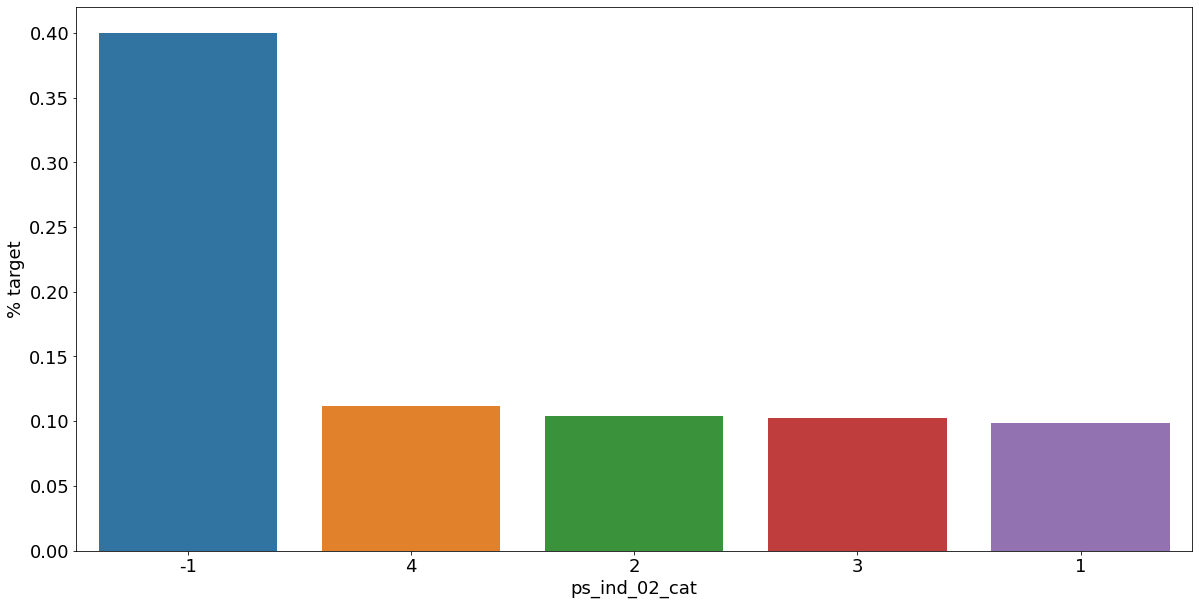

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

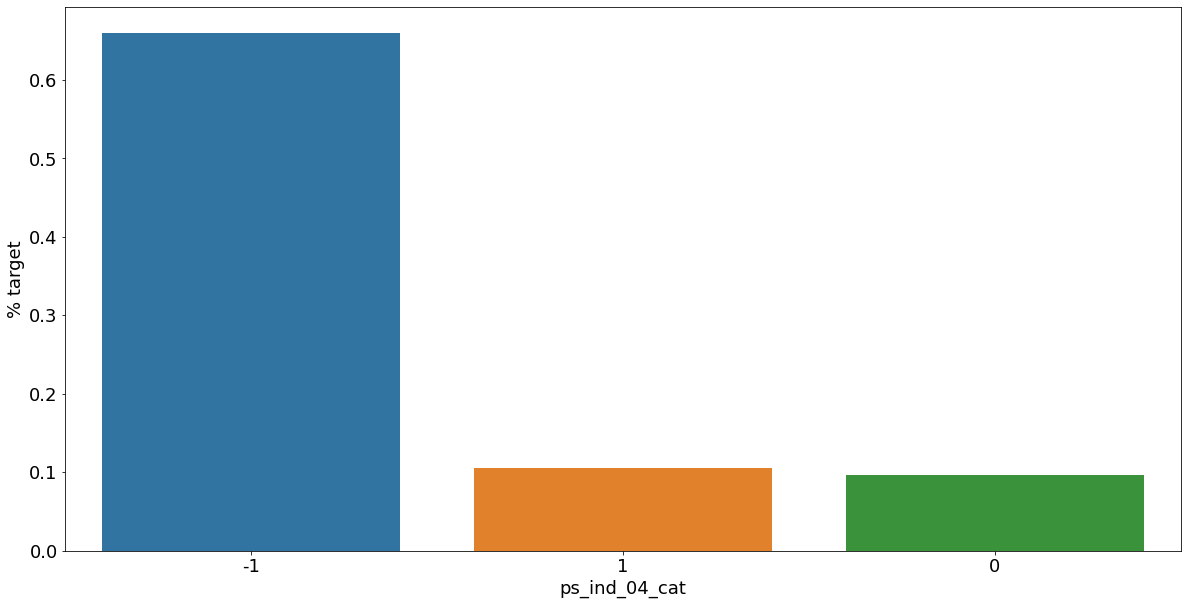

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

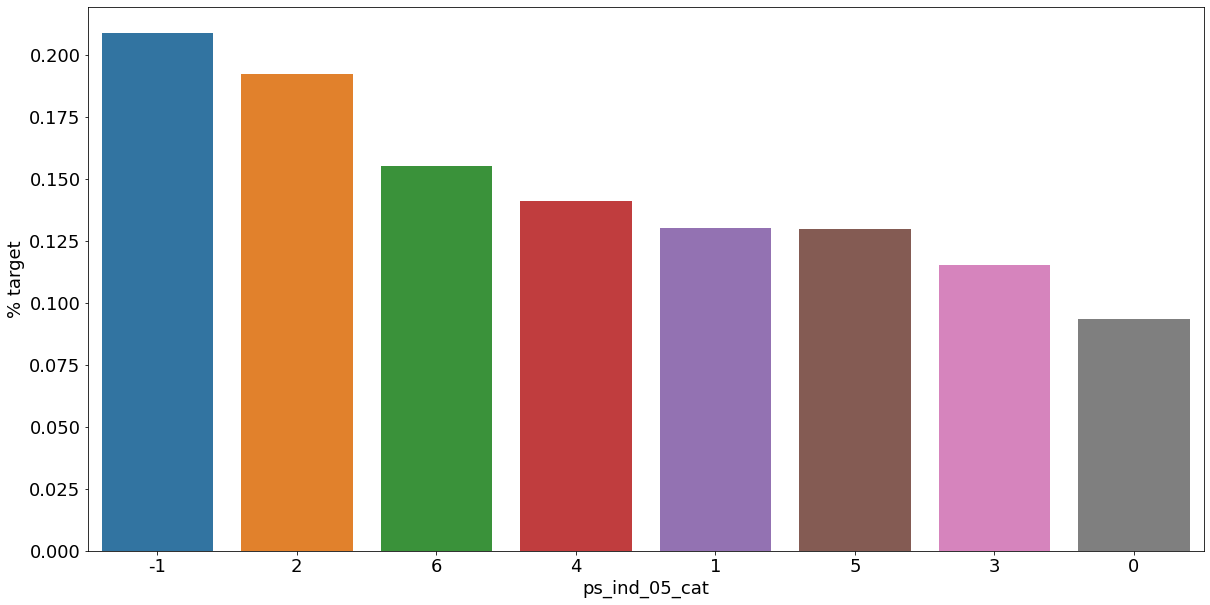

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

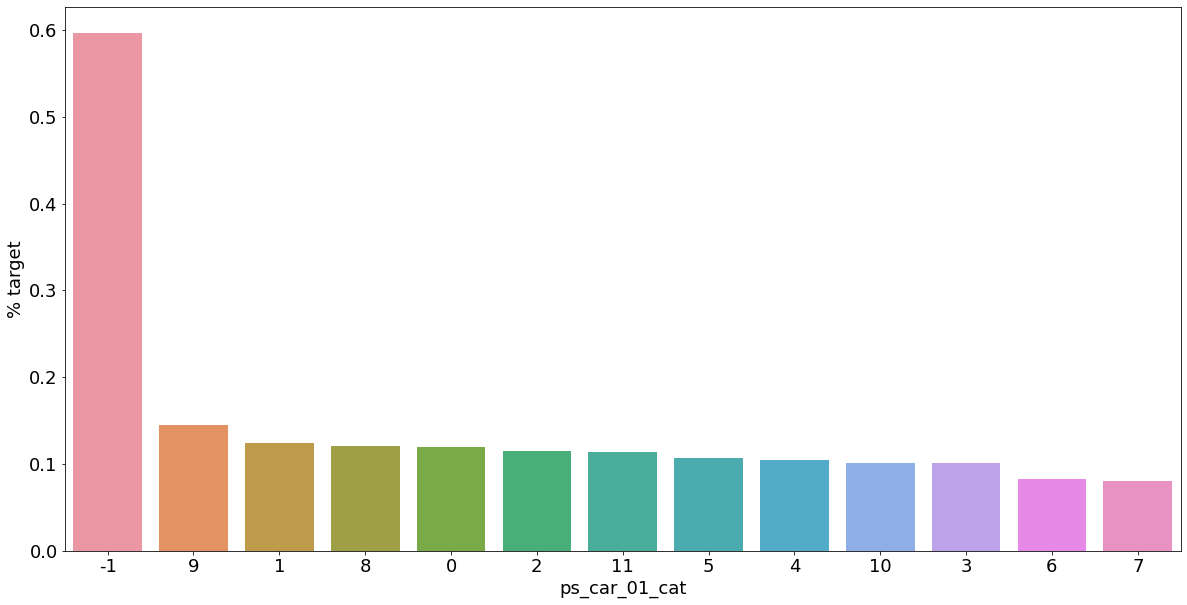

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

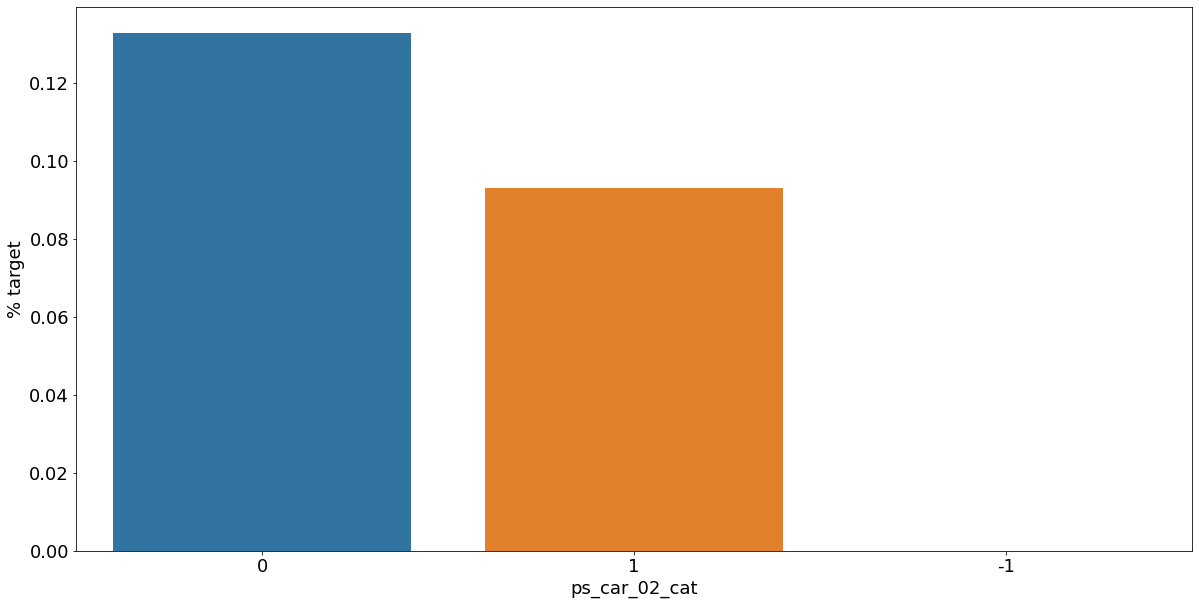

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

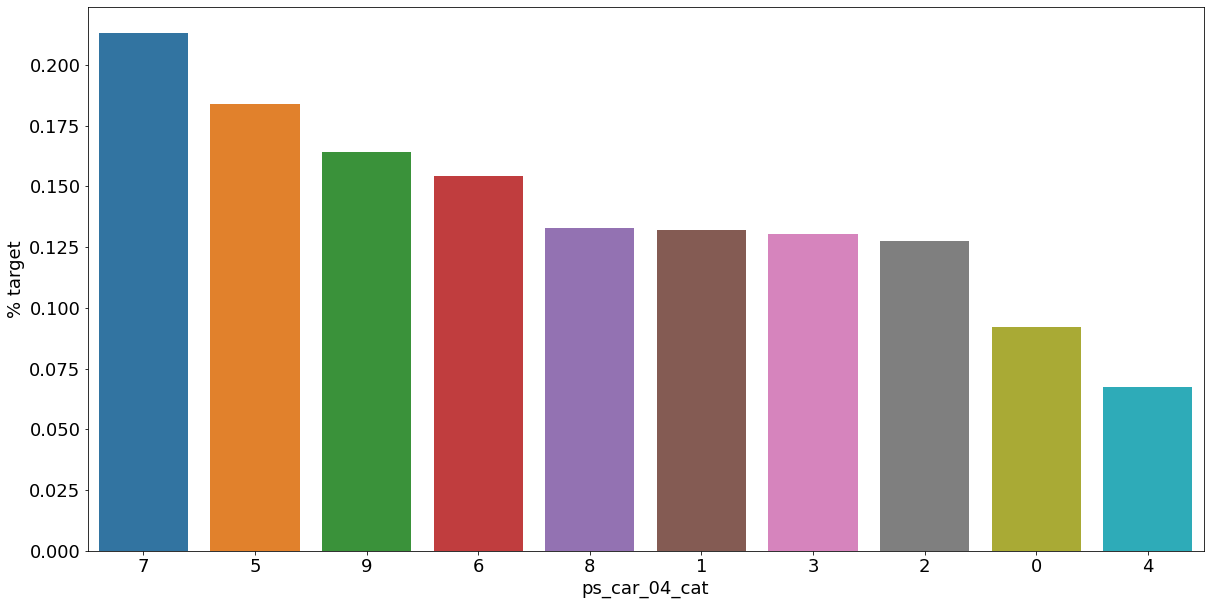

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

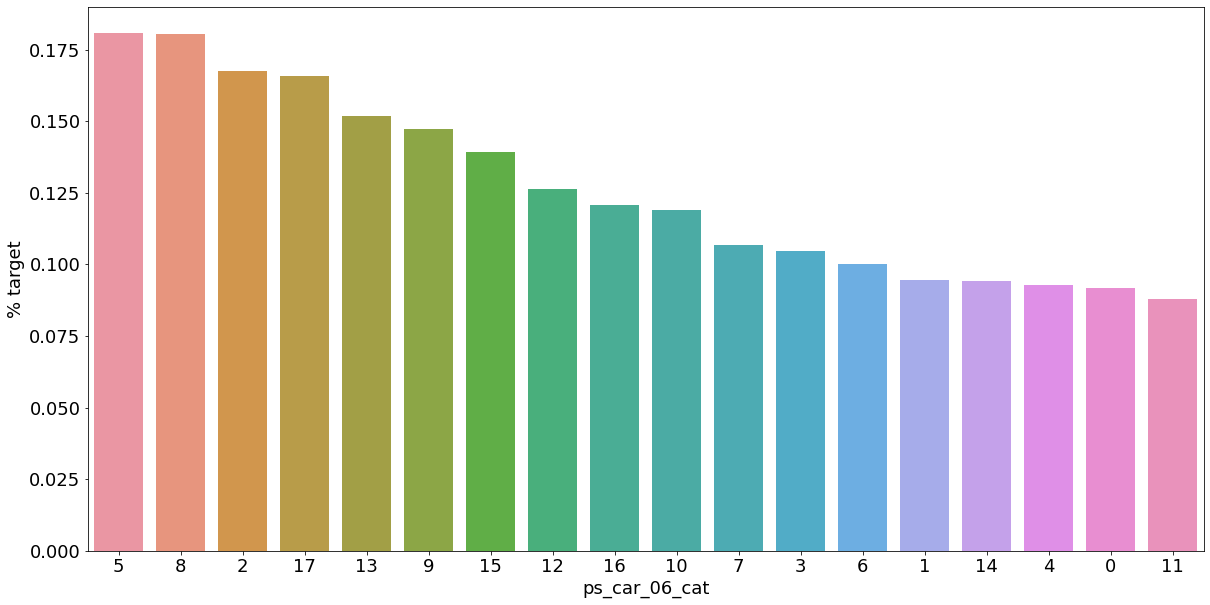

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

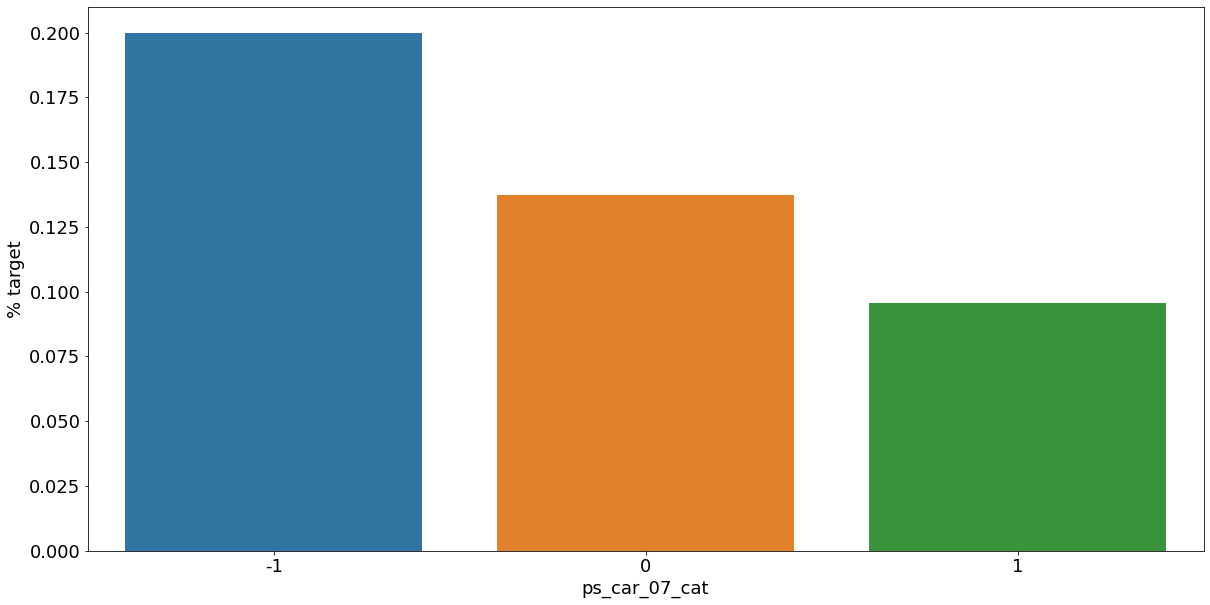

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

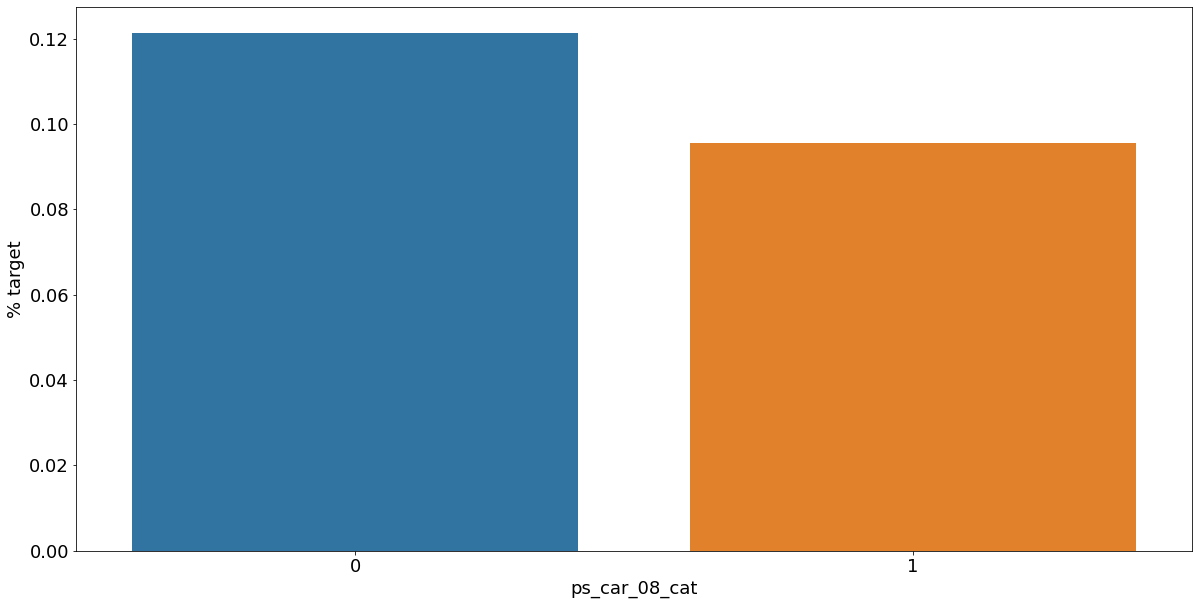

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

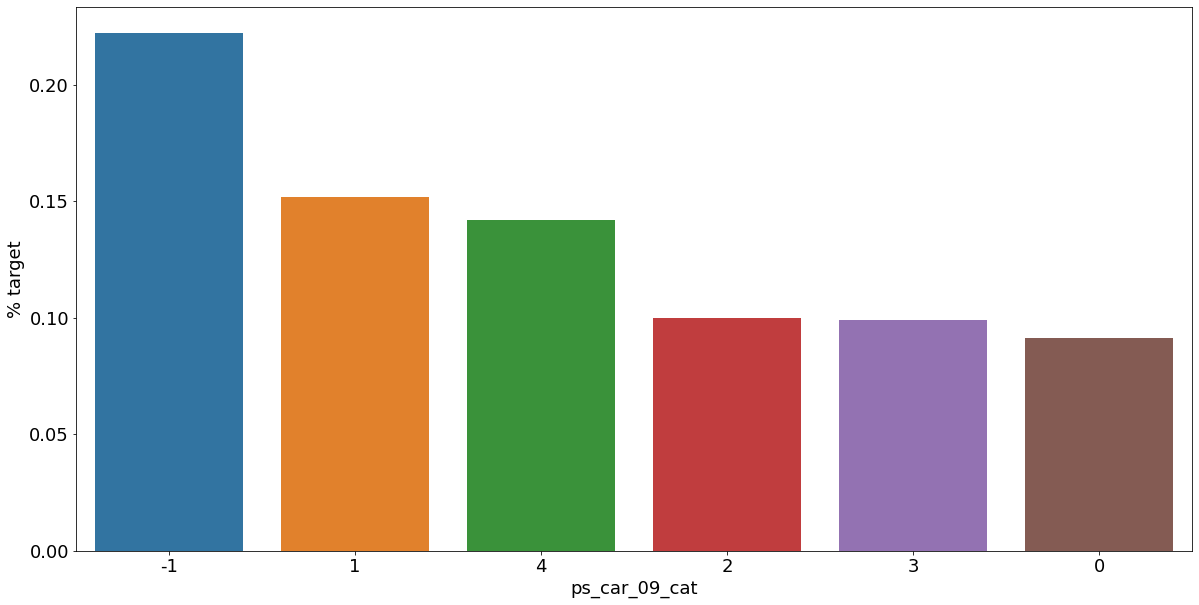

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

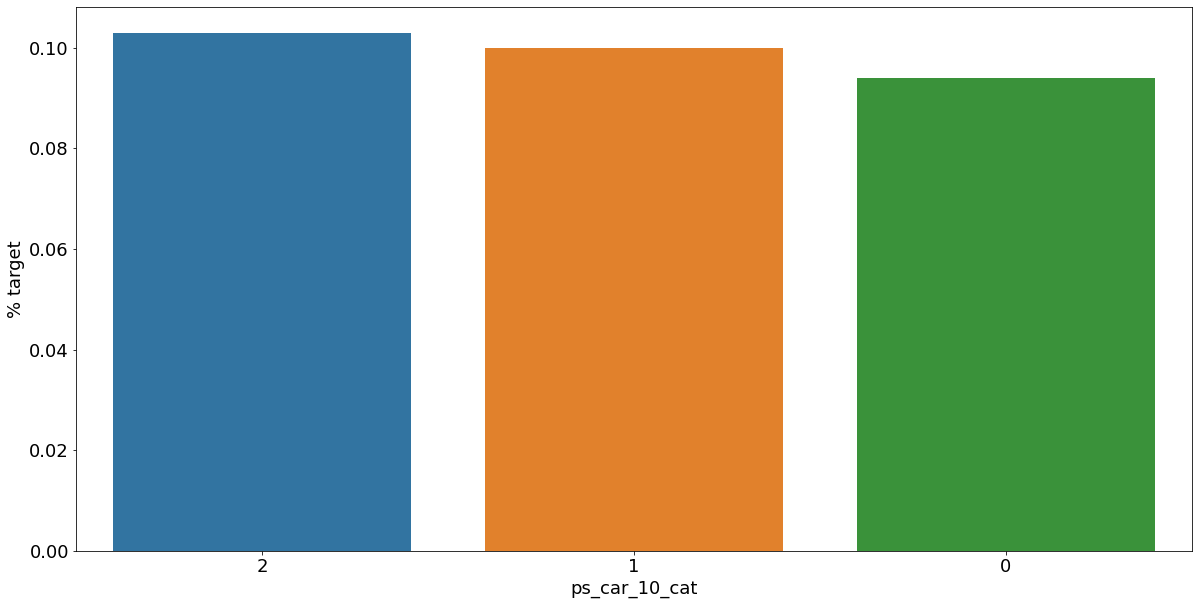

KeyError: ignored

<Figure size 432x288 with 0 Axes>

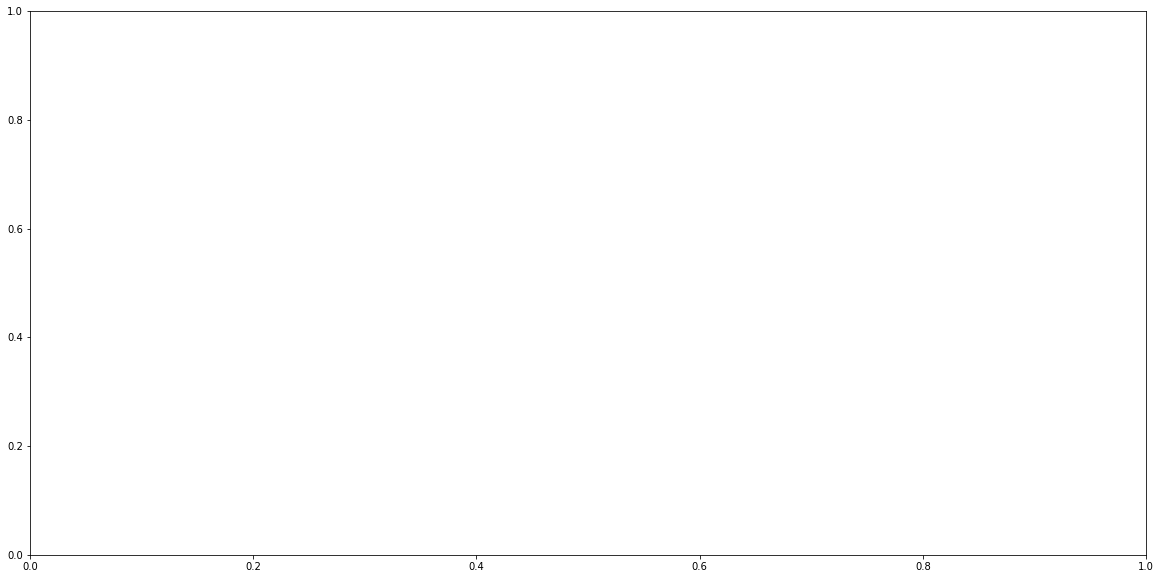

In [ ]:
v=meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v :
  plt.figure()
  fig,ax = plt.subplots(figsize=(20,10))
  #Calculate the percentage of target=1 per category value
  cat_perc = train[ [f,'target']].groupby([f], as_index=False).mean()
  cat_perc.sort_values('target', ascending=False, inplace=True)
  #draw a bar plot
  #Order the bars descending on target mean
  sns.barplot(f, 'target', data=cat_perc, order=cat_perc[f], ax=ax)
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

Interval variables

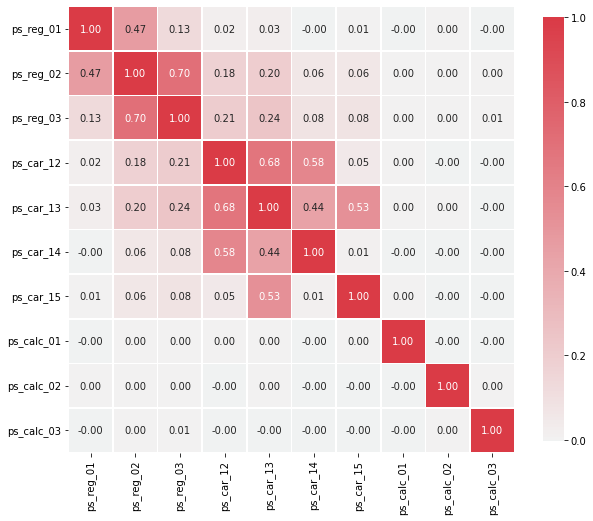

In [ ]:
def corr_heatmap(v) :
  correlations = train[v].corr()

  #Create color amp ranging between two colors
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig,ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations,cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.78} )
  plt.show()

v=meta[ (meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations btw the variables : 

- ps_reg_02 and ps_reg_03
- ps_car_12 and ps_car_13
- ps_car_14 and ps_car_12
- ps_car_15 and ps_car_13


In [ ]:
s=train.sample(frac=0.1)

ps_reg_02 and ps_reg_03

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


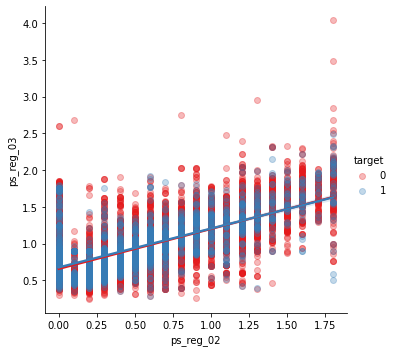

In [ ]:
sns.lmplot('ps_reg_02', 'ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha' :0.3})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


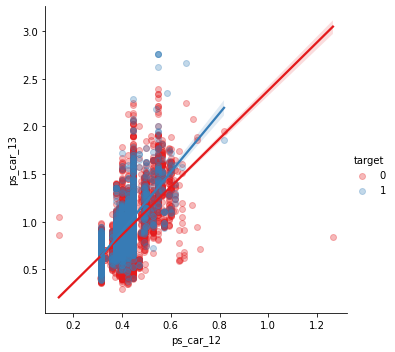

In [ ]:
sns.lmplot('ps_car_12', 'ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha' :0.3})
plt.show()

In [ ]:
sns.lmplot('ps_car_14', 'ps_car_12', data=s, hue='target', palette='Set1', scatter_kws={'alpha' :0.3})
plt.show()

In [ ]:
sns.lmplot('ps_car_15', 'ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha' :0.3})
plt.show()

Checking the correlations between ordinal variables

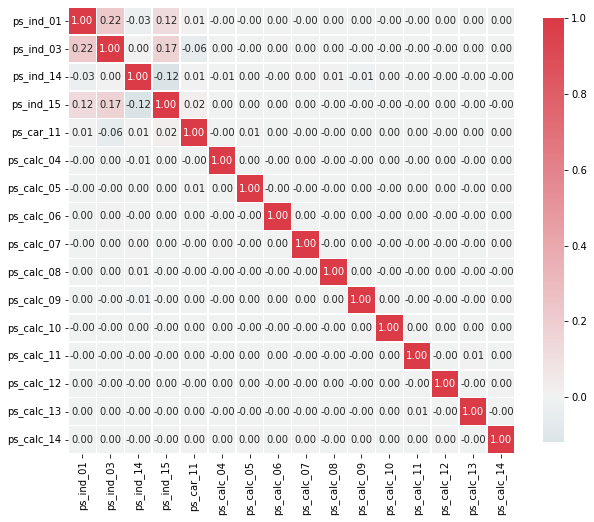

In [ ]:
v=meta[ (meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

#Feature Engineering

Creating dummy variables

The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that, We drop the first dummy variables as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [ ]:
v=meta[(meta.level == 'nominal') & (meta.keep)].index

print('Before dummification we have {} variables in train'.format(train.shape[1]))

train=pd.get_dummies(train, columns=v, drop_first=True)

print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train


KeyError: ignored

Creating interaction variables

In [ ]:
v=meta[(meta.level == 'interval') & (meta.keep)].index

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))

interactions.drop(v, axis=1, inplace=True)
#concat the intereaction variables to the train data

print('Before creating interactions we have {} variables in train'.format(train.shape[1]))

train=pd.concat([train,interactions],axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 57 variables in train
After creating interactions we have 112 variables in train


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Feature selection

Removing features with low or zero variance

In [ ]:
selector= VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'],axis=1))
#Fit to train without id and target variables

f=np.vectorize(lambda x  : not x)
#Function to toggle boolean array elements

v=train.drop(['id','target'], axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance'.format(len(v)))

print('These variables are {}'.format(list(v)))

11 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

Sklearn also comes with other feature selection methods. one of these mothods is selectfrommodel in which tou let another classifier select the best features and continue with these.

Selecting features with a Random Forest and SelectFromModel

In [ ]:
x_train = train.drop(['id','target'],axis=1)

y_train=train['target']

feat_labels = x_train.columns

rf=RandomForestClassifier(n_estimators = 100, random_state=42, n_jobs=-1)

rf.fit(x_train,y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[: :-1]

for f in range(x_train.shape[1]) :
  print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.023129
 2) ps_car_13^2                    0.018292
 3) ps_car_13                      0.018126
 4) ps_reg_03 ps_car_13            0.017863
 5) ps_car_13 ps_car_14            0.017711
 6) ps_reg_01 ps_car_13            0.017622
 7) ps_car_12 ps_car_13            0.017520
 8) ps_car_13 ps_car_15            0.016997
 9) ps_reg_03 ps_car_14            0.016947
10) ps_reg_03 ps_car_12            0.015853
11) ps_reg_03 ps_car_15            0.015753
12) ps_car_14 ps_car_15            0.015694
13) ps_car_13 ps_calc_01           0.015313
14) ps_reg_02 ps_car_13            0.015137
15) ps_car_13 ps_calc_03           0.015136
16) ps_reg_01 ps_reg_03            0.015115
17) ps_car_13 ps_calc_02           0.014926
18) ps_reg_01 ps_car_14            0.014816
19) ps_calc_10                     0.014466
20) ps_reg_03^2                    0.014440
21) ps_calc_14                     0.014410
22) ps_reg_03                      0.014365
23) ps_reg_03 ps_calc_03        

With SelectFrommodel we can specify which prefit classifier to use and wha t the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

In [ ]:
sfm=SelectFromModel(rf, threshold='median', prefit=True)

print('#features before selection : {}'.format(x_train.shape[1]))

n_features=sfm.transform(x_train).shape[1]
print('#features after selection : {}'.format(x_train.shape[1]))

selected_vars = list(feat_labels[sfm.get_support()])

#features before selection : 110


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#features after selection : 110


In [ ]:
train=train[selected_vars + ['target']]

Feature Scaling

As mentions before, we can apply standard scaling to the training data, some classifiers perform better when this is done.

In [ ]:
scaler= StandardScaler()
scaler.fit_transform(train.drop(['target'],axis=1))

array([[-0.52496987, -0.64281526, -1.31851969, ...,  0.03941168,
         2.13623545,  0.33840411],
       [ 1.69137659, -0.3606316 , -0.28418829, ...,  1.68794039,
         3.03478925,  1.68508184],
       [ 0.95259444,  0.20373572,  0.23031185, ...,  0.48901042,
        -1.00870288, -1.00827361],
       ...,
       [ 0.58320336,  0.48591938, -0.59179694, ..., -0.01054374,
         0.4888868 ,  0.18877325],
       [-0.89436094, -1.48936624, -1.01929506, ..., -0.51009789,
         0.4888868 , -0.40975018],
       [-1.26375202,  1.61465401,  0.62365576, ..., -0.41018706,
        -0.70918495, -0.11048846]])